# Thông tin thành viên nhóm

|STT|Họ và tên|Mã số sinh viên|
|:---|:---|:---|
|1|Lê Đức Huy|19120080|
|2|Hoàng Dược Lam|19120267|
|3|Mai Duy Nam| 19120298|

# 1. Xây dựng mô hình khí hậu

Mô hình khí hậu đơn giản nhất được xây dựng như sau:

$$ \text{change in heat} = \text{absorbed solar radiation} - \text{outgoing thermal radiation} + \text{human-caused greenhouse effect} $$

$$ \Delta Q = I - O + G $$

Với:
* $\Delta$Q : change in heat (W/m^2)
* I: absorbed solar radiation (W/m^2)
* O: outgoing thermal radiation (W/m^2)
* G: human-caused greenhouse effect (W/m^2)

Người ta đã sử dụng công thức sau để dự đoán nhiệt độ:
$$ \Delta Q = C\frac{dT}{dt} $$

$$ Với: C= \text{51 J/m^2/°C} $$

Suy ra lượng nhiệt thay đổi theo thời gian là:
$$\frac{dT}{dt} = \frac{1}{C}\Delta Q$$

Ta lần lượt làm rõ các yếu tố trong công thức của mô hình:
* absorbed solar radiation: bức xạ mặt trời được hấp thụ  (I)
* outgoing thermal radiation: bức xạ nhiệt phản xạ ra ngoài  (O)
* human-caused greenhouse effect: hiệu ứng nhà kính  (G)

## 1.1 Absorbed solar radiation
Lượng nhiệt được hấp thụ được tính bằng:

$$ I = \frac{S(1-\alpha)}{4} $$

Với:
* S = 1368 W/m^2 (solar insolation)
* $\alpha$ = 0.3


## 1.2 Outgoing thermal radiation
Trong tài liệu có ghi: 
"Since these physics are too complicated to deal with here, we linearize the model _combining the incoming and the outgoing_."

Do đó người ta có đưa ra đạo hàm phương trình nhiệt lượng theo thời gian:
$$ \text{temp}'(t) = B(\text{temp}(0) - \text{temp}(t)) $$

Với $B = 1.3 W/m^2/°C$

Nếu ta gọi $T$ là nhiệt độ Trái đất thay cho $\text{temp}$ thì viết gọn lại nó sẽ được:

$$ \text{I - O} = B(T_0 - T_t) $$

- Với $T_0$ là nhiệt độ trung bình của trái đất từ năm bắt đầu công nghiệp (1850): $14^o C$
- $T_t$ là nhiệt độ trái đất vào năm thứ $t$

Có thể thấy rằng, $(T_0 - T_t)$ chính là sự thay đổi nhiệt độ từ năm bắt đầu công nghiệp 1850 tới năm đang xét, ta rút gọn công thức như sau:

$$ \text{I - O} = -B\Delta T_t $$

Với: $\Delta$T là sự thay đổi nhiệt từ năm bắt đầu công nghiệp 1850

## 1.3 Human-caused greenhouse effect
Với kinh nghiệm của các nhà khoa học, hiệu ứng nhà kính sẽ được tính bằng một hàm logarit của nồng độ khí CO2:

$$ G = (forcing\_coef) \ln{\frac{\lvert \text{CO}_2 \rvert}{{\lvert \text{CO}_2 \rvert}_{\text{preindustrial}}}}$$

Với: $ forcing\_coef = 5 (W/m^2)$

Và ta có: 

$$ \frac{\lvert \text{CO}_2 \rvert}{{\lvert \text{CO}_2 \rvert}_{\text{preindustrial}}} = 1 + \left(\frac{t}{220}\right)^3 $$

Với t là khoảng cách thời gian từ 1850. Ta kí hiệu lại $\Delta$t

Thế lại vào phương trình trên mình có được:

$$ G = (forcing\_coef) \ln{\left(1 + \left(\frac{\Delta t}{220}\right)^3 \right)} $$

## 1.4 Tổng hợp các công thức

Nhiệt độ thay đổi theo thời gian ban đầu đã có: 

$$\frac{dT}{dt} = \frac{1}{C}\Delta Q$$

$$\frac{dT}{dt} = \frac{1}{C}((I - O) + G) $$

$$ \frac{dT}{dt} = \frac{1}{C} \left( -B\Delta T_t + (forcing\_coef) \ln{\left(1 + \left(\frac{\Delta t}{220}\right)^3 \right)} \right) $$

$$ T_{t+1} - T_t = \frac{1}{C} \left( -B\Delta T_t + (forcing\_coef) \ln{\left(1 + \left(\frac{\Delta t}{220}\right)^3 \right)}\right) $$

$$ T_{t+1} - T_0 - T_t + T_0 = \frac{1}{C} \left( -B\Delta T_t + (forcing\_coef) \ln{\left(1 + \left(\frac{\Delta t}{220}\right)^3 \right)}\right) $$

$$ \Delta T_{t+1} = \frac{1}{C} \left( -B\Delta T_t + (forcing\_coef) \ln{\left(1 + \left(\frac{\Delta t}{220}\right)^3 \right)}\right) + \Delta T_t $$

Trong đó:
* $C = 51 \text{ J/m^2/°C}$
* $B = 1.3 \text{ W/m^2/°C}$
* $forcing\_coef = 5 \text{ W/m^2}$

# 2. Kiểm thử mô hình và so sánh giá trị dự đoán với dữ liệu của NASA

## 2.1 Kiểm thử mô hình

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style='whitegrid')

In [2]:
C = 51
B = 1.3
FC = 5

T = 0
Ts = [T]

for t in range(250):
    T += 1/C * (-B*T + FC * np.log(((1 + (t/220)**3))))
    Ts.append(T)

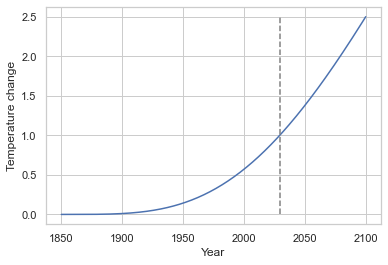

In [3]:
plt.plot(np.arange(1850, 2101), Ts)
plt.plot([2030, 2030], [0, 2.5], '--', color='gray')
plt.xlabel('Year')
plt.ylabel('Temperature change');

Như vậy theo dự báo của mô hình, nhiệt độ của Trái đất đến năm 2030 sẽ tăng 1 độ C so với thời kỳ tiền công nghiệp.

## 2.2 So sánh giá trị dự đoán từ mô hình so với dữ liệu của NASA

In [4]:
nasa_df = pd.read_csv('graph.csv')
nasa_df.head()

,Year,No_Smoothing,Lowess(5)
0,1880,-0.17,-0.09
1,1881,-0.08,-0.13
2,1882,-0.11,-0.17
3,1883,-0.18,-0.20
4,1884,-0.29,-0.24


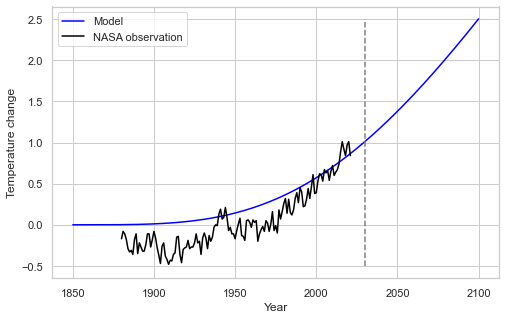

In [5]:
plt.figure(figsize=(8, 5))

plt.plot(np.arange(1850, 2101), Ts, color='blue')
plt.plot(nasa_df['Year'], nasa_df['No_Smoothing'], color='black')
plt.plot([2030, 2030], [-0.5, 2.5], '--', color='gray')

plt.legend(['Model', 'NASA observation'])
plt.xlabel('Year')
plt.ylabel('Temperature change');

Nhìn chung, độ tăng nhiệt độ của Trái đất dự đoán theo mô hình có hình dạng tương đối khớp so với dữ liệu từ NASA.